In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

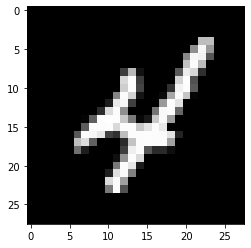

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9], cmap='gray')
plt.show()

In [6]:
x_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [7]:
y_train.shape

(60000,)

In [8]:
x_train=x_train.reshape(-1,28*28).astype("float32")/255.0
x_test=x_test.reshape(-1,28*28).astype("float32")/255.0

In [10]:
model=keras.Sequential(
    [
        layers.Dense(512,activation="relu"),
        layers.Dense(256,activation="relu"),
        layers.Dense(10),
    ])

In [11]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [19]:
history=model.fit(x_train, y_train, batch_size =32, epochs =5,verbose=2)

Epoch 1/5
1875/1875 - 11s - loss: 0.0284 - accuracy: 0.9911 - 11s/epoch - 6ms/step
Epoch 2/5
1875/1875 - 13s - loss: 0.0225 - accuracy: 0.9932 - 13s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 12s - loss: 0.0200 - accuracy: 0.9936 - 12s/epoch - 6ms/step
Epoch 4/5
1875/1875 - 11s - loss: 0.0184 - accuracy: 0.9937 - 11s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 13s - loss: 0.0158 - accuracy: 0.9949 - 13s/epoch - 7ms/step


In [20]:
model.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 1s - loss: 0.1015 - accuracy: 0.9790 - 900ms/epoch - 3ms/step


[0.10152973979711533, 0.9789999723434448]

In [21]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [22]:
y_pred=y_prob.argmax(axis=1)

In [30]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


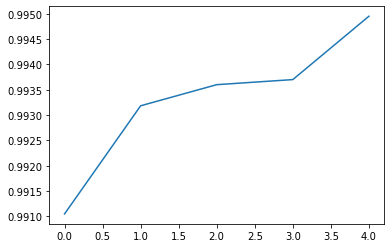

In [37]:

plt.plot(history.history['accuracy'])